In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [12]:
# Defining thresholds
AT = 40    # Accelerometer threshold
GT = 5    # Gyroscope threshold

In [13]:
BASE_PATH = os.getcwd()

path = os.path.join(BASE_PATH, 'dataset', 'caida', '6.csv')
df = pd.read_csv(path)

In [14]:
df.head()

,time,ax,ay,az,wx,wy,wz
0,0.005,0.14,0.03,0.2,0.14,-0.05,-0.02
1,0.005,0.14,0.03,0.2,0.14,-0.04,-0.03
2,0.005,0.14,0.03,0.2,0.14,-0.03,-0.03
3,0.005,0.14,0.00,0.1,0.14,-0.03,-0.03
4,0.006,0.14,0.00,0.1,0.14,-0.02,-0.03


In [15]:
df.drop_duplicates(subset=["time"], keep='last', inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,time,ax,ay,az,wx,wy,wz
0,0.005,0.14,0.00,0.10,0.14,-0.03,-0.03
1,0.006,0.13,-0.02,0.02,0.13,0.03,-0.04
2,0.007,0.10,-0.15,-0.39,0.09,0.08,-0.05
3,0.008,0.25,-0.11,-0.58,0.05,0.11,-0.05
4,0.009,0.33,-0.11,-0.75,-0.01,0.11,-0.07


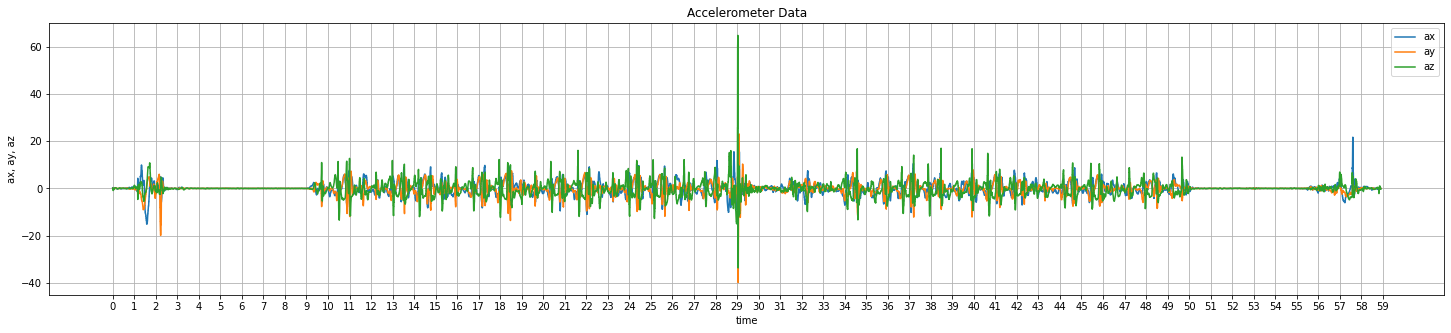

In [16]:
fig, ax = plt.subplots(figsize=(25,5))
ax.grid(True)

ax.plot(df['time'], df['ax'], label='ax')
ax.plot(df['time'], df['ay'], label='ay')
ax.plot(df['time'], df['az'], label='az')

plt.title("Accelerometer Data")
plt.xticks(np.arange(min(df['time']), max(df['time'])+1, 1))

ax.set_xlabel('time')
ax.set_ylabel('ax, ay, az')


plt.legend()
plt.show()

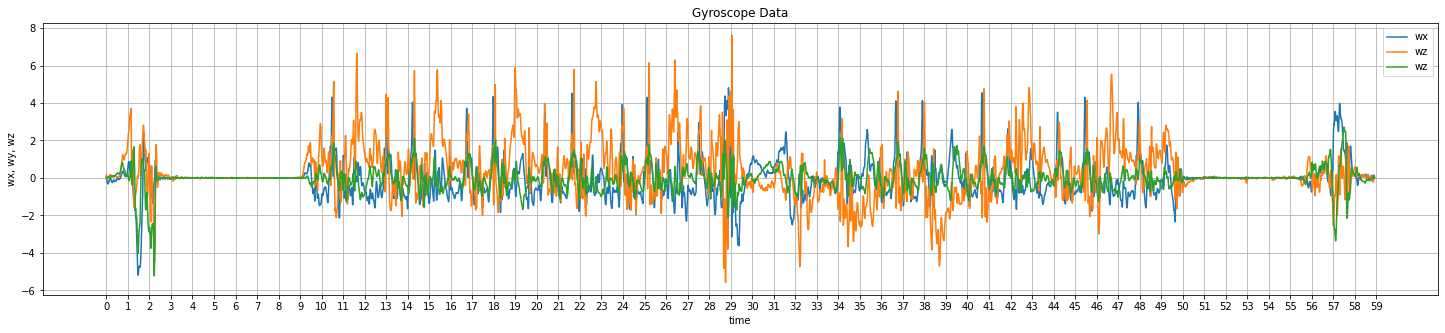

In [17]:
fig, ax = plt.subplots(figsize=(25,5))
ax.grid(True)

ax.plot(df['time'], df['wx'], label='wx')
ax.plot(df['time'], df['wy'], label='wz')
ax.plot(df['time'], df['wz'], label='wz')

plt.title("Gyroscope Data")
plt.xticks(np.arange(min(df['time']), max(df['time'])+1, 1))

ax.set_xlabel('time')
ax.set_ylabel('wx, wy, wz')


plt.legend()
plt.show()

In [18]:
df['acc'] = np.sqrt(df['ax'] ** 2 + df['ay'] ** 2 + df['az'] ** 2)
df['omega'] = np.sqrt(df['wx'] ** 2 + df['wy'] ** 2 + df['wz'] ** 2)

In [19]:

res = df.loc[
    (df['acc'] > AT) &
    (df['omega'] > GT) 
]

In [20]:
print(res.to_string())

         time     ax     ay     az    wx    wy    wz        acc     omega
12850  29.030   1.34   3.64  50.97  2.16  4.65  0.30  51.117376  5.135961
12851  29.033   1.34   3.64  50.97  3.07  4.42  0.64  51.117376  5.419493
12852  29.034   0.07  -1.33  60.56  3.07  4.42  0.64  60.574643  5.419493
12853  29.036   0.07  -1.33  60.56  3.25  4.21  0.86  60.574643  5.387597
12854  29.037  -4.36 -10.70  64.87  3.13  3.93  1.01  65.890944  5.124637
12860  29.050  18.49 -39.00 -28.42 -2.27  5.02  0.02  51.677621  5.509419
12861  29.052  18.49 -39.00 -28.42 -3.15  6.35 -0.47  51.677621  7.103936
12862  29.053  18.91 -39.85 -33.71 -3.15  6.35 -0.47  55.515536  7.103936
12863  29.056  18.91 -39.85 -33.71 -2.86  7.42 -0.85  55.515536  7.997406
12864  29.057  17.20 -39.04 -19.72 -2.86  7.42 -0.85  46.998298  7.997406
12865  29.060  17.20 -39.04 -19.72 -2.37  7.61 -1.03  46.998298  8.036784
